Identifying the relationship between a students area of study, age, gender and year of study to their mental health conditions could give valuable insights and help identify which students are the most at risk of experience these specific issues.

# Initialization

In [ ]:
!pip install seaborn -U

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.__version__

'0.13.0'

In [ ]:
data = pd.read_csv('/content/Student_Mental_health.csv')

In [ ]:
df_clean = data.copy()
df_clean.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# Data Cleaning

In [ ]:
# Check dtypes
print('Col types:\n',df_clean.dtypes,'\n','='*25,sep='')

# Check for NA values
print('Number of NA per Col:')
df_clean.isna().sum()

Col types:
Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object
Number of NA per Col:


Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
# Since only age has NA we can replace it with the mean as an int
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean()).astype('int64')
df_clean.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

All NA values have been filled/removed<br/>
Check all text columns for inconsistencies

In [ ]:
# Rename columns for clarity
df_clean.rename(columns={
'Choose your gender':'Gender',
'What is your course?':'Course',
'Your current year of Study':'Year',
'What is your CGPA?':'GPA',
'Marital status':'Married',
'Do you have Depression?':'Depression',
'Do you have Anxiety?':'Anxiety',
'Do you have Panic attack?':'Panic_Attacks',
'Did you seek any specialist for a treatment?':'Treatment'}, inplace=True)

### Year

In [ ]:
# Check Year values
df_clean['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

Just the number is required not the 'year' before it

In [ ]:
# Removing everything that is not a number using regex
df_clean['Year'] = df_clean['Year'].str.replace(r'\D', '', regex=True).astype('int64')

### Course

In [ ]:
# Count unique values before imputation
print('Unique values in Course:',df_clean['Course'].unique().shape[0])

Unique values in Course: 49


Here I am using value counts for additional context.
If a similar value has few entries it could be a typo or a personal formatting choice and should be converted to a shared value.

In [ ]:
# Check unique values for Course
# Sorting by index to sort alphabetically
df_clean['Course'].value_counts().sort_index()

Many of the unique values in Courses are just a case of inconsistent capitalization as seen in these values:
* BENL, benl
* Islamic Education, Islamic education
* KIRKHS, Kirhks

This can be resolved by enforcing consistent formatting on this column

In [ ]:
# Capitalize Courses columns and check unqiue values again
# Also stripping Course values of trailing whitespaces
df_clean['Course'] = df_clean['Course'].str.capitalize().str.strip()
print('Unique values in Course:',df_clean['Course'].unique().shape[0])

Unique values in Course: 41


Additional formatting issues, mainly spelling are also present as seen in these values:
* Engin, Engine, Engineering
* Fiqh fatwa, Fiqh
* Laws, Law

These values will be systematically replaced with one of their values

In [ ]:
# Replace redundancies with one of the values
df_clean['Course'].replace({'Engin':'Engineering','Engine':'Engineering','Fiqh fatwa':'Fiqh','Laws':'Law'},inplace=True)
print('Unique values in Course:',df_clean['Course'].unique().shape[0])

Unique values in Course: 37


### Binary Columns

In [ ]:
# Check Binary columns (Yes/No)
bool_cols = ['Gender','Married','Depression','Anxiety','Panic_Attacks','Treatment']
for col in bool_cols:
  print(col,':\n',df_clean[col].unique(),'\n','='*25,sep='')

Gender:
['Female' 'Male']
Married:
['No' 'Yes']
Depression:
['Yes' 'No']
Anxiety:
['No' 'Yes']
Panic_Attacks:
['Yes' 'No']
Treatment:
['No' 'Yes']


All of the Binary Columns are correctly filled without inconsistencies in formatting!

### GPA

In [ ]:
# Check GPA
print(df_clean['GPA'].unique())

['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']


In [ ]:
# Clean GPA
df_clean['GPA'] = df_clean['GPA'].str.strip()
print(df_clean['GPA'].unique())

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


GPA only contained 1 simple formatting inconsistency in the form of extra whitespace at the end of one entry.

# EDA

* Identifying potential outliers
* Finding initial relationships between data points
* Plotting count and barplots for the categorical columns

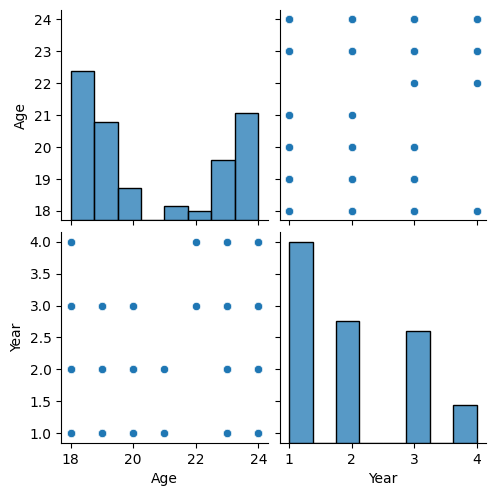

In [ ]:
sns.pairplot(df_clean)

## Per Course and Year Responses

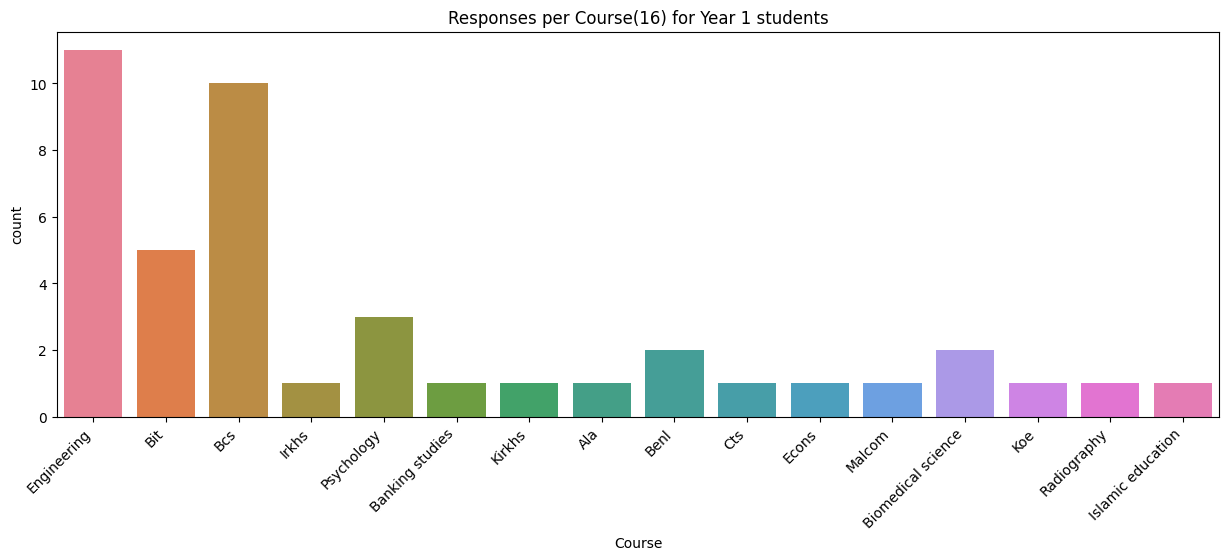

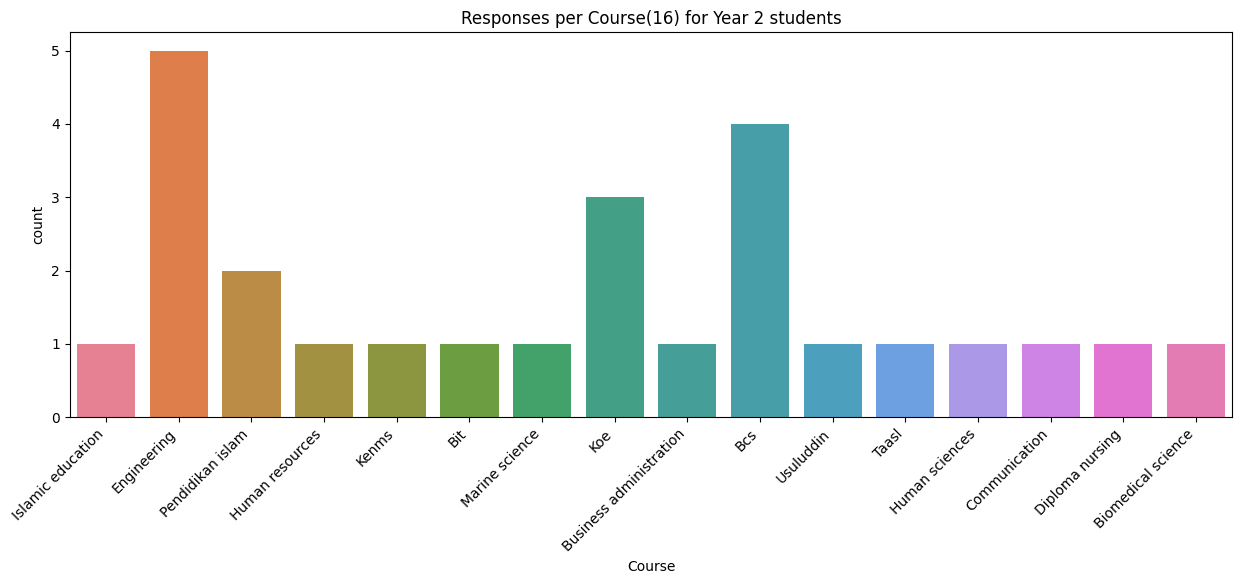

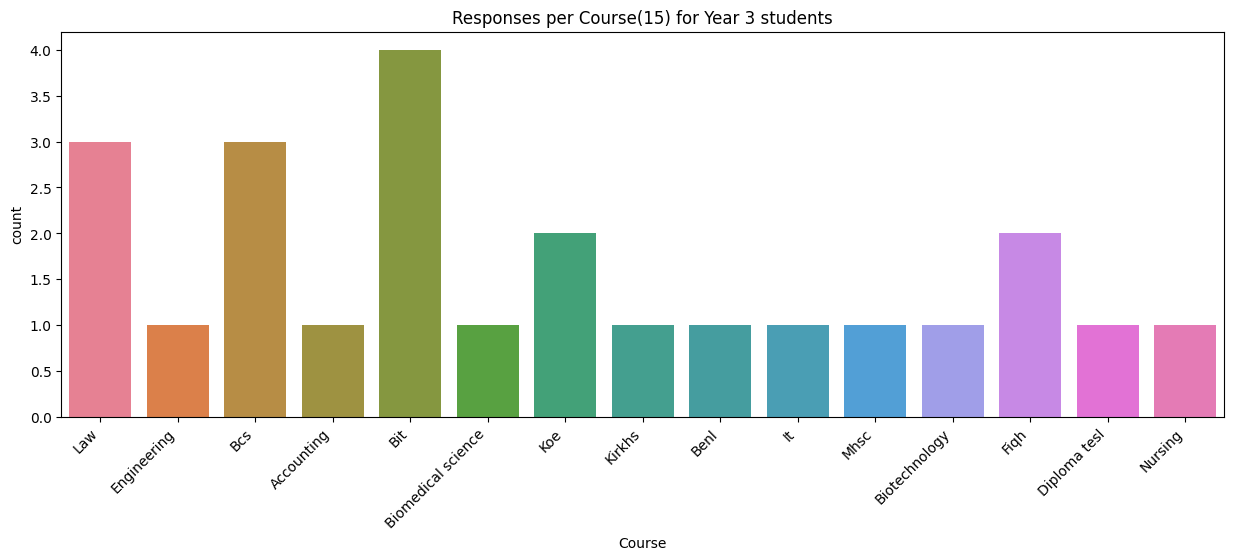

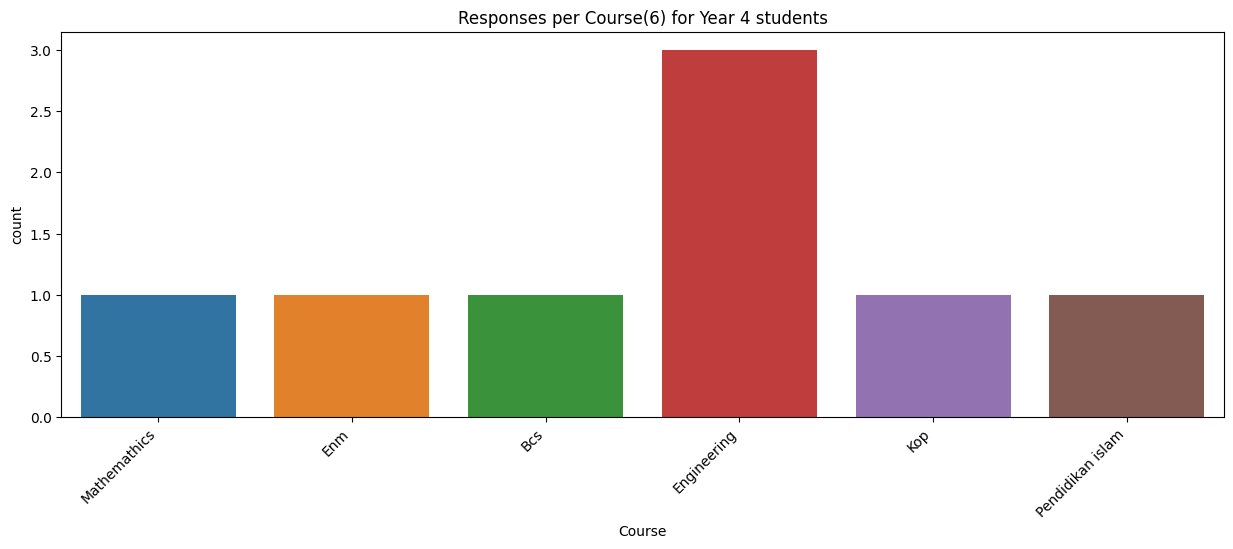

In [ ]:
# Check count of surveys for each course per year
for year in df_clean['Year'].unique():
  plt.figure(figsize=(15,5))
  filtered_data = df_clean[df_clean['Year'] == year]
  sns.countplot(data=filtered_data, x='Course',hue=filtered_data['Course'],legend=False)
  plt.title(f'Responses per Course({len(filtered_data["Course"].unique())}) for Year {year} students')
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [ ]:
df_sorted = df_clean.copy()
courseCategory = pd.CategoricalDtype(categories=df_clean['Course'].value_counts().index)
df_sorted['Course'] = df_sorted['Course'].astype(courseCategory)
df_sorted = df_sorted.sort_values(by=['Course'])

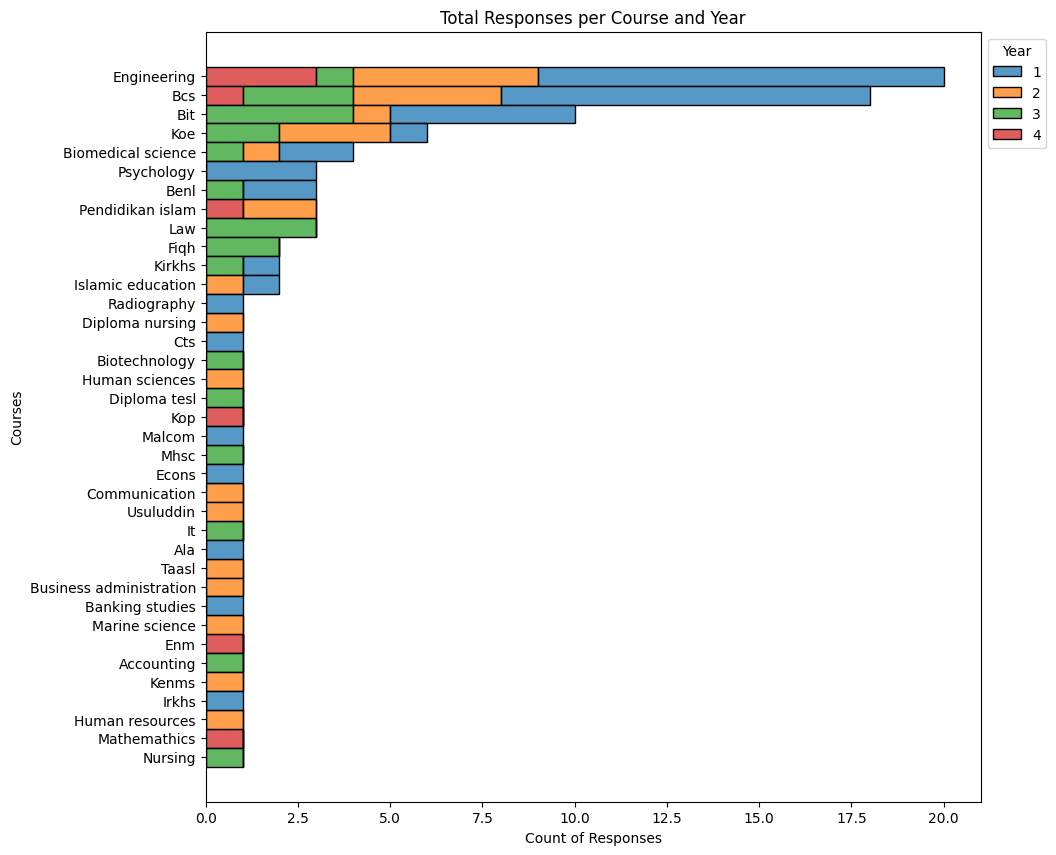

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.histplot(data=df_sorted,y='Course',hue='Year',multiple='stack',palette='tab10')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title('Total Responses per Course and Year')
plt.ylabel('Courses')
plt.xlabel('Count of Responses')
plt.show()

* Engineering and BcS programs had the most submissions overall
* 4th year students have the least number of submissions
  * Could mean many things, dropping out, course length of < 4 years, or potentially time of the year
* Only Engineering and BcS have responses in all 4 years of study
* Inconsistencies in course naming conventions are likely impacting the numbers

## Gender to Responses & Conditions

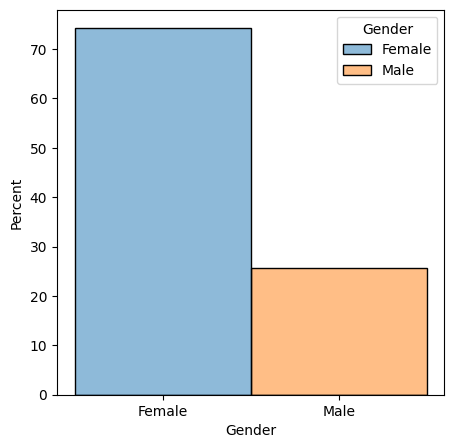

In [ ]:
# Check the Distribution of Gender in responses
plt.figure(figsize=(5,5))
sns.histplot(data=df_clean, x='Gender', hue='Gender', stat='percent')
plt.show()

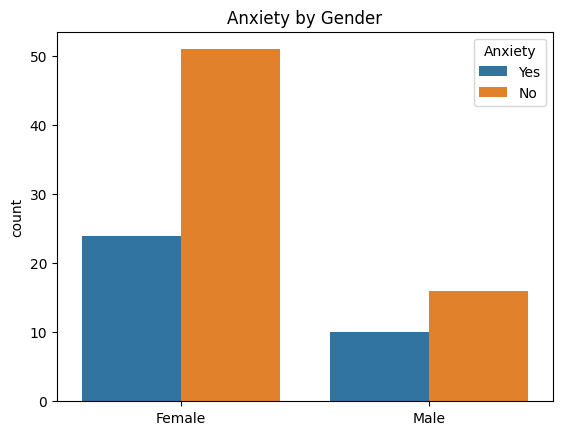

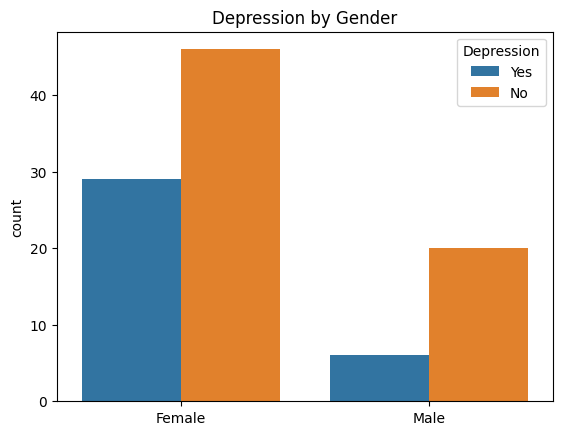

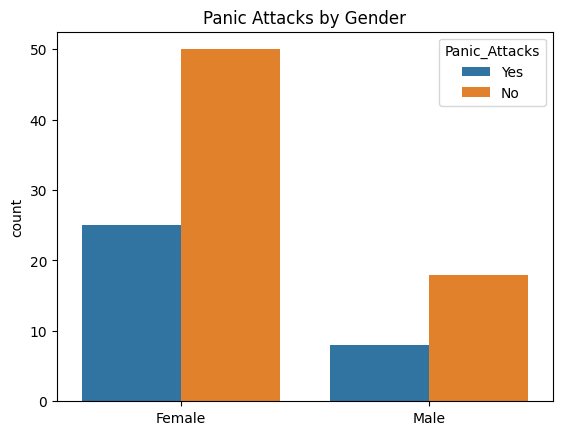

In [ ]:
# Compare Gender to Mental Health conditions
sns.countplot(data=df_clean, hue='Anxiety', x='Gender', hue_order=['Yes','No'])
plt.title('Anxiety by Gender')
plt.xlabel('')
plt.show()

sns.countplot(data=df_clean, hue='Depression', x='Gender', hue_order=['Yes','No'])
plt.title('Depression by Gender')
plt.xlabel('')
plt.show()

sns.countplot(data=df_clean, hue='Panic_Attacks', x='Gender', hue_order=['Yes','No'])
plt.title('Panic Attacks by Gender')
plt.xlabel('')
plt.show()

* Female Students make up a mojority so it makes sense they overpower the counts
* Female students also seem to have a more consistent ratio for all conditions
* Depression for Male students has the largest discrepency reported

## Course to Conditions with Gender

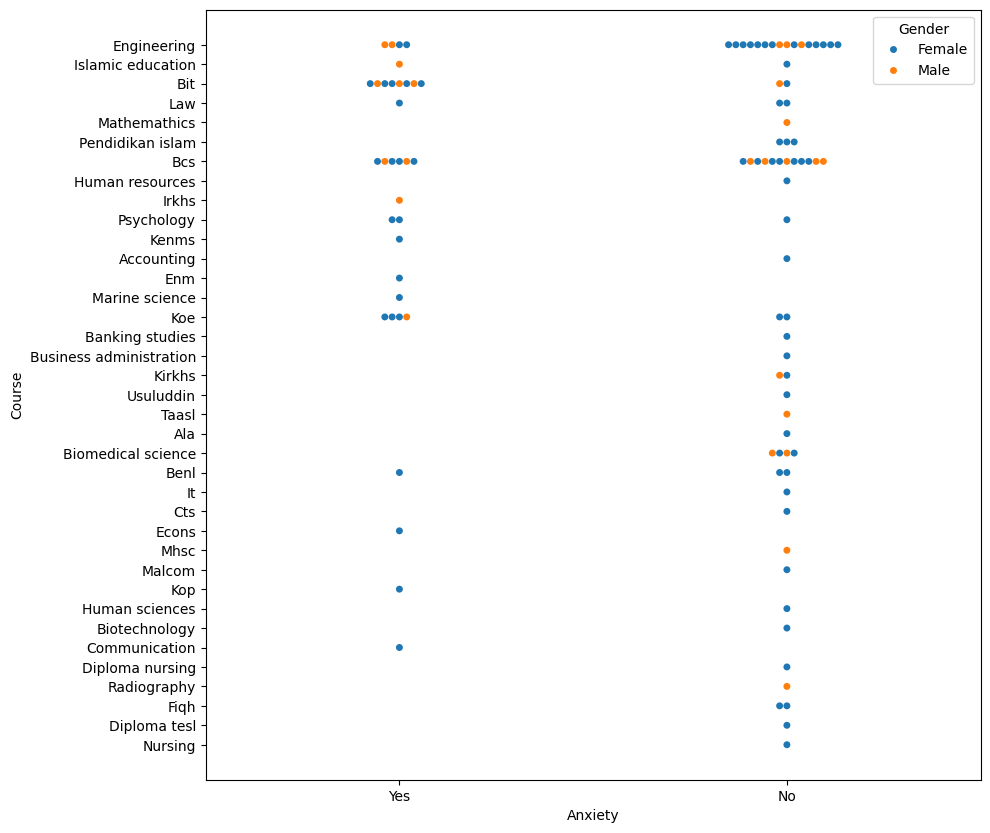

In [ ]:
# Compare courses to Anxiety and Gender
plt.figure(figsize=(10, 10))
sns.swarmplot(data=df_clean, x='Anxiety', y='Course', hue='Gender',order=['Yes','No'])
plt.show()

* Engineering students are the least likely to have anxiety
* BIT and Koe students are the most likely to have anxiety
* BcS students are split almost evenly
  * But, 3/4 males in BIT experience anxiety

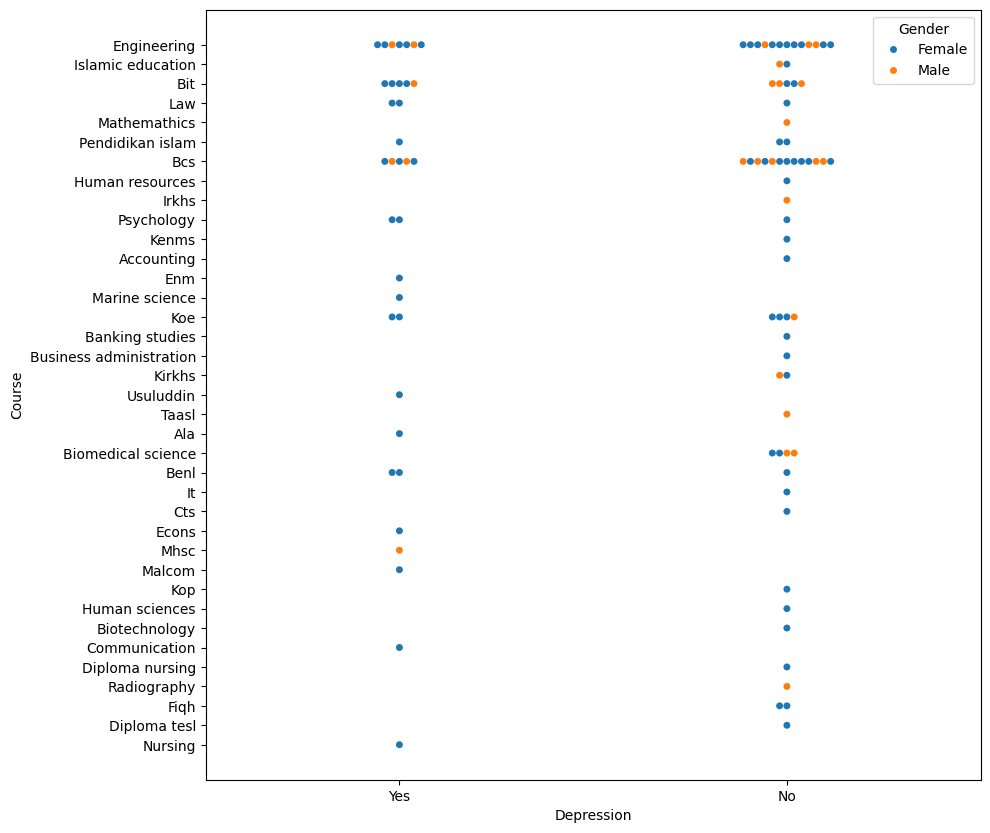

In [ ]:
# Compare Courses to Depression and Gender
plt.figure(figsize=(10, 10))
sns.swarmplot(data=df_clean, x='Depression', y='Course', hue='Gender',order=['Yes','No'])
plt.show()

* None of the courses are particularrily prone to Depression
* BCS and Engineering are the least prone to Depression
* BIT students are split almost evenly
  * 4/6 Females reported Depression compared to 1/4 males

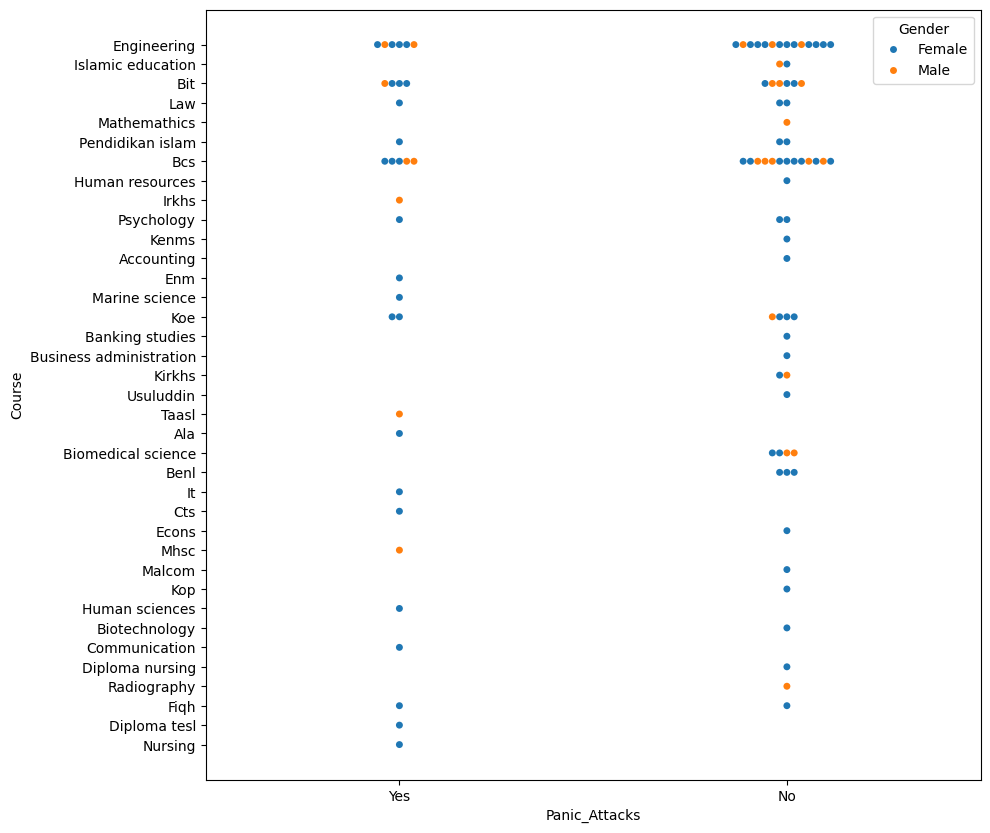

In [ ]:
# Compare Courses to Panic Attacks and Gender
plt.figure(figsize=(10, 10))
sns.swarmplot(data=df_clean, x='Panic_Attacks', y='Course', hue='Gender',order=['Yes','No'])
plt.show()

* Islamic education, Benl and Biomedical science students are the least prone to panic attacks
* BIT students are evenly split

Overall
* Males were less likely to report depression compared to Anxiety and Panic Attacks
* BIT students were consistently reporting at ~50% for all conditions recorded

#Modelling

**Model selection:**
* A majority of the features in this dataset are captured as categorical with the 2 exceptions of Age and the Timestamp
* This means Classification models will be more applicable

Potential features to predict on:
* GPA
* Depression
* Anxiety
* Panic Attacks

In [ ]:
df_clean.head(5)

,Timestamp,Gender,Age,Course,Year,GPA,Married,Depression,Anxiety,Panic_Attacks,Treatment
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,Bit,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [ ]:
for col in df_clean.columns:
  print(df_clean[col].value_counts().sort_index(),'\n','='*50,sep='')

## Data Pre-Processing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df_model = df_clean.copy()
df_model.drop(columns='Timestamp',inplace=True)
df_model.dtypes

Gender           object
Age               int64
Course           object
Year              int64
GPA              object
Married          object
Depression       object
Anxiety          object
Panic_Attacks    object
Treatment        object
dtype: object

In [ ]:
# Convert Binary columns into numeric
for col in bool_cols:
  df_model[col] = df_model[col].replace({'Yes':1,'No':0})

In [ ]:
# Create categorical variables
df_model['Course'] = df_model['Course'].astype(courseCategory).cat.codes
df_model['Gender'] = df_model['Gender'].astype(pd.CategoricalDtype(categories=['Male','Female'])).cat.codes
df_model['GPA'] = df_model['GPA'].astype(pd.CategoricalDtype(categories=df_model['GPA'].unique())).cat.codes

In [ ]:
df_model.dtypes

Gender            int8
Age              int64
Course            int8
Year             int64
GPA               int8
Married          int64
Depression       int64
Anxiety          int64
Panic_Attacks    int64
Treatment        int64
dtype: object

## Train models

Split processed data into Train and Test sets

In [ ]:
# Split data
X = df_model.drop(columns=['Depression'])
y = df_model['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=89)

Use cross-validation to estimate the accuracy of the selected models

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=43)
decision_tree.fit(X_train,y_train)
print('Decision Tree:',cross_val_score(decision_tree, X_train, y_train, cv=8).mean())

# Random Forest
random_forest = RandomForestClassifier(random_state=43)
random_forest.fit(X_train,y_train)
print('Random Forest:',cross_val_score(random_forest, X_train, y_train, cv=8).mean())

Decision Tree: 0.7430555555555556
Random Forest: 0.7899305555555556


Random Forest performed better on average, so that will be my model of choice

In [ ]:
# Now predict on the test set
pred_rforest = random_forest.predict(X_test)

print('Accuracy:',accuracy_score(y_test,pred_rforest))
print('Classification Report:\n',classification_report(y_test,pred_rforest),sep='')

Accuracy: 0.8387096774193549
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.88      0.64      0.74        11

    accuracy                           0.84        31
   macro avg       0.85      0.79      0.81        31
weighted avg       0.84      0.84      0.83        31



After predicting on the test set and running some evaluation metrics, we can see that this model is relatively accurate at predicting whether a student will identify themselves as having depression in this survey.